![example](images/cover_image.webp)

# Aviation Risk Evaluation

**Author:** Kelvin Kipkorir
***

## Overview
Our company has decided to diversify its business portfolio by entering the aviation industry. It aims to purchase and operate airplanes for both commercial and private enterprises. This analysis utilizes data from the National Transportation Safety Board (1962–2023), which includes aviation accident records, to identify the aircraft with the lowest risk. Additionally, the findings will be translated into actionable insights to assist the head of the new aviation division in making informed aircraft purchasing decisions.


## Business Problem

Our company is expanding into the aviation industry by purchasing and operating aircraft for both commercial and private enterprises. However, one of the key challenges is determining which aircraft models pose the least risk in terms of safety and operational efficiency.To address this, we will analyze aviation accident data to identify aircraft with the lowest risk. This analysis will focus on factors such as accident rates, causes, and operational conditions. By answering these questions, we aim to provide actionable insights that will help the head of the new aviation division make data-driven decisions on which aircraft to purchase, ensuring both safety and business sustainability.



## Data Understanding

The data used in this analysis is from the National Transportation Safety Board(NTSB) and is obtained from [kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses).The NTSB aviation accident dataset contains information from 1962 to 2023 about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters

The dataset contains 88889 rows and 31 columns and each record row is an aviation inncident that was recorded.

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# look through our directory
!ls

AviationData.csv
Discontinued_Aircraft_List.csv
README.md
USState_Codes.csv
dsc-phase1-project-template.ipynb
images


In [3]:
#Read the aviation_csv  
orig_aviation_df = pd.read_csv('AviationData.csv',encoding='latin-1',low_memory=False)
orig_aviation_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#checking for missing values
orig_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
#looking at dataset's columns
orig_aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

****
Before beginning the analysis, I looked at the meaning of each of the column and here are few of the columns and the descriptions of the data they hold:
<br>
****
**Amateur.Built** - Indicates whether an aircraft was homebuilt by an individual or manufactured by a certified company.<br>
**FAR.Description** - Specifies the Federal Aviation Regulations (FAR) under which the aircraft was operating.<br>
**Broad.phase.of.flight**- Identifies the phase of flight in which an accident occurred (e.g. Takeoff, Landing).<br>
**Injury.Severity** - Categorizes the severity of injuries in an accident (e.g., Fatal).
****

In [6]:
#looking at total null values per column
orig_aviation_df.isna().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: i


Since our analysis focused more on finding aircraft with the least risk we can look at the most common makes and models of planes with most accidents.Also which aircraft category have the most accidents

In [7]:
#Looking through the values of makes to see which have the most common accidents
orig_aviation_df['Make'].value_counts()

Cessna                    22227
Piper                     12029
CESSNA                     4922
Beech                      4330
PIPER                      2841
                          ...  
Sisk                          1
Baby Bird                     1
Texas Helicopter Corp.        1
HOWARD                        1
Hoster/volmer                 1
Name: Make, Length: 8237, dtype: int64

In [8]:
# models to see which have the most accidents
orig_aviation_df['Model'].value_counts()

152                    2367
172                    1756
172N                   1164
PA-28-140               932
150                     829
                       ... 
RANS S6ES Coyote II       1
Robinson R22 Beta         1
ULTRASTAR                 1
173 RG                    1
DA20 - C1                 1
Name: Model, Length: 12318, dtype: int64

In [9]:
#aircraft category
orig_aviation_df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [10]:
#Injury.Severity
orig_aviation_df['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(174)        1
Fatal(199)        1
Fatal(114)        1
Fatal(21)         1
Fatal(73)         1
Name: Injury.Severity, Length: 109, dtype: int64

In [11]:
#purpose of the flight
orig_aviation_df['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [12]:
#exploring the Report.Status
orig_aviation_df['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                                                                  61754
Foreign                                                                                                                                                                                                                                                          1999
<br /><br />                                                                                                                                                                                                                                                      167
Factual                                                                                                                                                                                                               

In [13]:
orig_aviation_df['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

In [14]:
orig_aviation_df['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

## Data Preparation

The dataset contains 31 columns most of which will are not important in the analysis.
Columns that are going to be dropped:
Longitude and Latitude - Since the countries and location variables can aternatively be used
Schedule,Air.Carrier,FAR Description - has high number of missing values
Airport.Code and Airport.Name - they don't directly relate to the problem at hand
Total.Minor.Injuries,Total.Serious.Injuries,Total.Fatal.Injuries,Total.Injured,Aircraft.damage - can be handled using the Injury.Severity column
Published date- the Event.Date can be used
Accident.Number,Investigation.Type,Event.ID,Report.Status and Registration.Number - they are more of identification data

Dealing with missing values in different columns:
Aircraft.Category,Broad.phase.of.flight - There are many missing values but since they are important variables I am going to replace.
For all other remaining columns I remove the null values.


Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [47]:
#Cleaning the columns we will not use 
columns_to_drop = ['Longitude','Latitude','Airport.Name','Airport.Code','Total.Minor.Injuries','Total.Serious.Injuries',
                   'Total.Fatal.Injuries','Total.Uninjured','Schedule','Accident.Number','Investigation.Type','Event.Id' ,
                   'Registration.Number','Publication.Date','Air.carrier','FAR.Description','Report.Status']
mod_aviation_df = orig_aviation_df.drop(columns_to_drop,axis=1) 

In [48]:
mod_aviation_df.head(3)

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,UNK,Cruise
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,UNK,Unknown
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,IMC,Cruise


In [49]:
mod_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Date             88889 non-null  object 
 1   Location               88837 non-null  object 
 2   Country                88663 non-null  object 
 3   Injury.Severity        87889 non-null  object 
 4   Aircraft.damage        85695 non-null  object 
 5   Aircraft.Category      32287 non-null  object 
 6   Make                   88826 non-null  object 
 7   Model                  88797 non-null  object 
 8   Amateur.Built          88787 non-null  object 
 9   Number.of.Engines      82805 non-null  float64
 10  Engine.Type            81812 non-null  object 
 11  Purpose.of.flight      82697 non-null  object 
 12  Weather.Condition      84397 non-null  object 
 13  Broad.phase.of.flight  61724 non-null  object 
dtypes: float64(1), object(13)
memory usage: 9.5+ MB


In [50]:
#Remove white spaces and lowers the case for all string columns
string_cols = mod_aviation_df.select_dtypes(include=["object"]).columns
mod_aviation_df[string_cols] = mod_aviation_df[string_cols].apply(lambda x: x.str.strip().str.lower())
mod_aviation_df.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"moose creek, id",united states,fatal(2),destroyed,NaN,stinson,108-3,no,1.0,reciprocating,personal,unk,cruise
1,1962-07-19,"bridgeport, ca",united states,fatal(4),destroyed,NaN,piper,pa24-180,no,1.0,reciprocating,personal,unk,unknown
2,1974-08-30,"saltville, va",united states,fatal(3),destroyed,NaN,cessna,172m,no,1.0,reciprocating,personal,imc,cruise
3,1977-06-19,"eureka, ca",united states,fatal(2),destroyed,NaN,rockwell,112,no,1.0,reciprocating,personal,imc,cruise
4,1979-08-02,"canton, oh",united states,fatal(1),destroyed,NaN,cessna,501,no,NaN,NaN,personal,vmc,approach


In [51]:
#Replacing Null values in the Aircraft.Category And Broad.phase.of.flight
mod_aviation_df['Aircraft.Category'].fillna("Unknown", inplace=True)
mod_aviation_df['Broad.phase.of.flight'].fillna('Uknown',inplace=True)
mod_aviation_df.isna().sum()

Event.Date                  0
Location                   52
Country                   226
Injury.Severity          1000
Aircraft.damage          3194
Aircraft.Category           0
Make                       63
Model                      92
Amateur.Built             102
Number.of.Engines        6084
Engine.Type              7077
Purpose.of.flight        6192
Weather.Condition        4492
Broad.phase.of.flight       0
dtype: int64

In [52]:

#Remove the missing values in the Engine type,Number of Engines
mod_aviation_df.dropna(subset=["Engine.Type","Number.of.Engines",'Purpose.of.flight'],inplace=True)
mod_aviation_df.isna().sum()

Event.Date                  0
Location                   18
Country                   216
Injury.Severity            18
Aircraft.damage          1194
Aircraft.Category           0
Make                       11
Model                      26
Amateur.Built              16
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Weather.Condition         305
Broad.phase.of.flight       0
dtype: int64

In [53]:
#Remove the missing values in Country,Weather.Condition,Make,Model,Amateur.Built,Injury.Severity,Location
mod_aviation_df.dropna(subset=["Country","Weather.Condition",'Make','Model','Amateur.Built','Injury.Severity','Location'],inplace=True)
mod_aviation_df.isna().sum()

Event.Date                  0
Location                    0
Country                     0
Injury.Severity             0
Aircraft.damage          1164
Aircraft.Category           0
Make                        0
Model                       0
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Weather.Condition           0
Broad.phase.of.flight       0
dtype: int64

In [54]:
#use the mode to replace Aircraft.damage category
mod_aviation_df['Aircraft.damage'].fillna(mod_aviation_df['Aircraft.damage'].mode()[0], inplace=True)
print(mod_aviation_df.shape)
mod_aviation_df.isna().sum()

(76512, 14)


Event.Date               0
Location                 0
Country                  0
Injury.Severity          0
Aircraft.damage          0
Aircraft.Category        0
Make                     0
Model                    0
Amateur.Built            0
Number.of.Engines        0
Engine.Type              0
Purpose.of.flight        0
Weather.Condition        0
Broad.phase.of.flight    0
dtype: int64

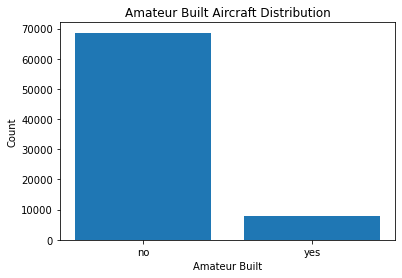

In [55]:
#Let visualize the armature built 
amature_dist = mod_aviation_df['Amateur.Built'].value_counts()
x = list(amature_dist.index[:2])
y = list(amature_dist.values[:2])

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x=x,height=y)
ax.set_title('Amateur Built Aircraft Distribution')
ax.set_xlabel('Amateur Built')
ax.set_ylabel('Count')
plt.show();


Since we are we want to venture into business the planes that we will want to purchase should be made by 
certified companies hence we will focus on airplanes which are not home made(Amateur.Built - No)

In [56]:
mod_aviation_df = mod_aviation_df[mod_aviation_df['Amateur.Built']=='no']
mod_aviation_df.shape

(68622, 14)

In [57]:
# Count total duplicate rows
duplicate_count = mod_aviation_df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

mod_aviation_df = mod_aviation_df.drop_duplicates()

Total duplicate rows: 29


In [58]:
mod_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68593 entries, 0 to 88767
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Date             68593 non-null  object 
 1   Location               68593 non-null  object 
 2   Country                68593 non-null  object 
 3   Injury.Severity        68593 non-null  object 
 4   Aircraft.damage        68593 non-null  object 
 5   Aircraft.Category      68593 non-null  object 
 6   Make                   68593 non-null  object 
 7   Model                  68593 non-null  object 
 8   Amateur.Built          68593 non-null  object 
 9   Number.of.Engines      68593 non-null  float64
 10  Engine.Type            68593 non-null  object 
 11  Purpose.of.flight      68593 non-null  object 
 12  Weather.Condition      68593 non-null  object 
 13  Broad.phase.of.flight  68593 non-null  object 
dtypes: float64(1), object(13)
memory usage: 7.8+ MB


In [72]:
pd.set_option("display.max_rows", None) #to see the whole range of values

# Show all aircraft makes with their counts
print(mod_aviation_df["Make"].value_counts())

cessna                            8673
piper                             4955
beech                             1742
bell                               738
mooney                             510
robinson                           498
bellanca                           312
air tractor                        305
hughes                             271
maule                              263
cirrus                             263
aeronca                            246
robinson helicopter                202
grumman                            195
schweizer                          185
champion                           180
luscombe                           178
air tractor inc                    175
stinson                            172
boeing                             166
robinson helicopter company        153
north american                     149
taylorcraft                        131
eurocopter                         118
aero commander                     116
aviat                    

Looking at the data above there are many repeated values 

In [73]:
#A dictionary holding repated values and their replacements
replacement_dict = {
    "zlin aviation": "zlin",
    "zlin aviation inc": "zlin",
    "cessna aircraft company": "cessna",
    "cessna aircraft co": "cessna",
    "cessna co": "cessna",
    "piper aircraft": "piper",
    "piper aircraft inc": "piper",
    "beechcraft corp": "beechcraft",
    "beech aircraft": "beechcraft",
    "beech aircraft corp": "beechcraft",
    "beechcraft aviation": "beechcraft",
    "bombardier inc": "bombardier",
    "bombardier aerospace": "bombardier",
    "boeing aircraft company": "boeing",
    "boeing co": "boeing",
    "boeing commercial airplanes": "boeing",
    "airbus industrie": "airbus",
    "airbus sas": "airbus",
    "airbus helicopters": "airbus",
    "hawker beechcraft": "hawker",
    "hawker aircraft": "hawker",
    "hawker siddeley": "hawker",
    "mooney aircraft": "mooney",
    "mooney international": "mooney",
    "gulfstream aerospace": "gulfstream",
    "gulfstream aerospace corp": "gulfstream",
    "embraer aircraft": "embraer",
    "embraer s.a.": "embraer",
    "sikorsky aircraft": "sikorsky",
    "sikorsky helicopters": "sikorsky",
    "cirrus aircraft": "cirrus",
    "cirrus design corp": "cirrus",
    "diamond aircraft": "diamond",
    "diamond aircraft industries": "diamond"
}

In [75]:
mod_aviation_df["Make"] = mod_aviation_df["Make"].replace(replacement_dict)
print(mod_aviation_df["Make"].value_counts())

cessna                            8673
piper                             4955
beech                             1742
bell                               738
mooney                             510
robinson                           498
bellanca                           312
air tractor                        305
hughes                             271
maule                              263
cirrus                             263
aeronca                            246
robinson helicopter                202
grumman                            195
schweizer                          185
champion                           180
luscombe                           178
air tractor inc                    175
stinson                            172
boeing                             166
robinson helicopter company        153
north american                     149
taylorcraft                        131
eurocopter                         118
aero commander                     116
aviat                    

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

Lets visualize accident trends over time

In [59]:
mod_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68593 entries, 0 to 88767
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Date             68593 non-null  object 
 1   Location               68593 non-null  object 
 2   Country                68593 non-null  object 
 3   Injury.Severity        68593 non-null  object 
 4   Aircraft.damage        68593 non-null  object 
 5   Aircraft.Category      68593 non-null  object 
 6   Make                   68593 non-null  object 
 7   Model                  68593 non-null  object 
 8   Amateur.Built          68593 non-null  object 
 9   Number.of.Engines      68593 non-null  float64
 10  Engine.Type            68593 non-null  object 
 11  Purpose.of.flight      68593 non-null  object 
 12  Weather.Condition      68593 non-null  object 
 13  Broad.phase.of.flight  68593 non-null  object 
dtypes: float64(1), object(13)
memory usage: 7.8+ MB


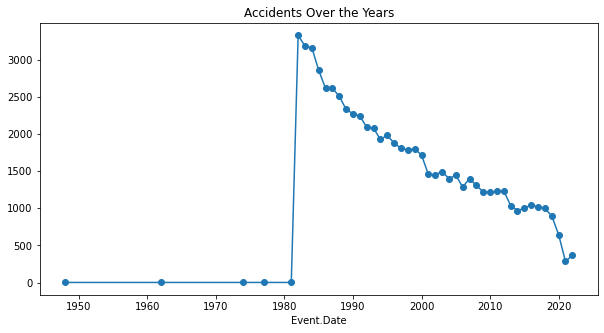

In [60]:
#first convert Event.Date to date time
mod_aviation_df['Event.Date'] = pd.to_datetime(mod_aviation_df['Event.Date'])  
yearly_accidents = mod_aviation_df.groupby(mod_aviation_df['Event.Date'].dt.year).size()

# visualize accident trends over time
yearly_accidents.plot(kind='line', figsize=(10,5), marker='o', title='Accidents Over the Years');


## Since it our company is going with more recent technology I filtered oru dataset to begin from the year 2000

In [64]:

mod_aviation_df = mod_aviation_df[mod_aviation_df['Event.Date'].dt.year >= 2000]

# Group by Make and Event Date
make_df = mod_aviation_df.groupby(['Make', 'Event.Date']).size()

make_df

Make                    Event.Date
177mf llc               2014-05-04    1
2021fx3 llc             2022-01-13    1
aaa aircraft leasing    2002-12-05    1
ab sportine aviacija    2017-08-02    1
ac mfg & dev't co       2007-04-03    1
                                     ..
zivko aeronautics inc.  2005-07-30    1
zlin                    2018-12-10    1
                        2019-01-03    1
zlin aviation           2020-11-15    1
zlin aviation s.r.o.    2007-08-15    1
Length: 20692, dtype: int64

In [63]:
mod_aviation_df['Purpose.of.flight'].value_counts()

personal                     16115
instructional                 4231
aerial application            1549
business                       871
positioning                    784
other work use                 494
aerial observation             328
unknown                        326
public aircraft                220
flight test                    208
executive/corporate            153
ferry                          152
skydiving                      133
external load                   97
banner tow                      94
public aircraft - federal       87
public aircraft - local         70
public aircraft - state         62
air race show                   38
glider tow                      35
air race/show                   29
firefighting                    23
air drop                         8
pubs                             2
asho                             1
publ                             1
Name: Purpose.of.flight, dtype: int64

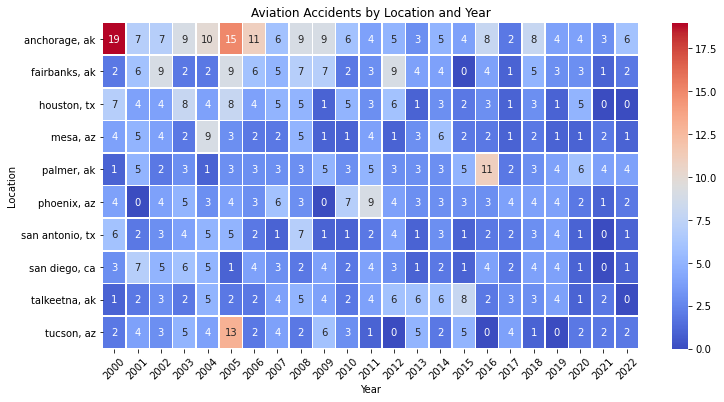

In [76]:

mod_aviation_df['Year'] = mod_aviation_df['Event.Date'].dt.year


# Select the top 10 most accident-prone locations
top_locations = mod_aviation_df['Location'].value_counts().head(10).index

# Filter dataset to include only top locations
filtered_df = mod_aviation_df[mod_aviation_df['Location'].isin(top_locations)]

# Create pivot table (rows: Location, columns: Year, values: count of accidents)
heatmap_data = filtered_df.pivot_table(index='Location', columns='Year', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt="d", linewidths=0.5)
plt.title("Aviation Accidents by Location and Year")
plt.xlabel("Year")
plt.ylabel("Location")
plt.xticks(rotation=45)
plt.show()


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***